In [5]:
!pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 4.8 MB/s eta 0:00:0000:0100:01


In [10]:
import pandas as pd
import numpy as np 
#import sklearn as skl
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as shc 
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [12]:
df= pd.read_csv('/Users/apple/Downloads/test_msft_goog_aapl (1).csv')

In [14]:
df.info()
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3771 entries, 0 to 3770
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3771 non-null   object 
 1   Ticker  3771 non-null   object 
 2   Close   3771 non-null   float64
 3   High    3771 non-null   float64
 4   Low     3771 non-null   float64
 5   Open    3771 non-null   float64
 6   Volume  3771 non-null   int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 206.4+ KB
         Date Ticker       Close        High         Low        Open  \
0  2020-04-16   AAPL   69.573654   69.940102   68.520428   69.741103   
1  2020-04-16   GOOG   62.875698   63.648538   61.838113   63.404694   
2  2020-04-16   MSFT  169.458908  169.688636  165.496189  166.836248   
3  2020-04-17   AAPL   68.629631   69.636755   67.188117   69.088298   
4  2020-04-17   GOOG   63.860031   64.416394   63.261866   63.939656   

      Volume  
0  157125200  
1   50362000  
2   50479600  
3  2

In [42]:
scaler = StandardScaler()
x = df[['Close']]
x_scaled = scaler.fit_transform(x)

x_scaled=(pd.DataFrame(x_scaled, columns=['scaled close']))


In [36]:

#useless dimensionality reduction 

#pca = PCA(n_components = 1)
#x_principal = pca.fit_transform(x_normalised)
#x_principal = pd.DataFrame(x_principal)
#x_principal.columns = ['P1']

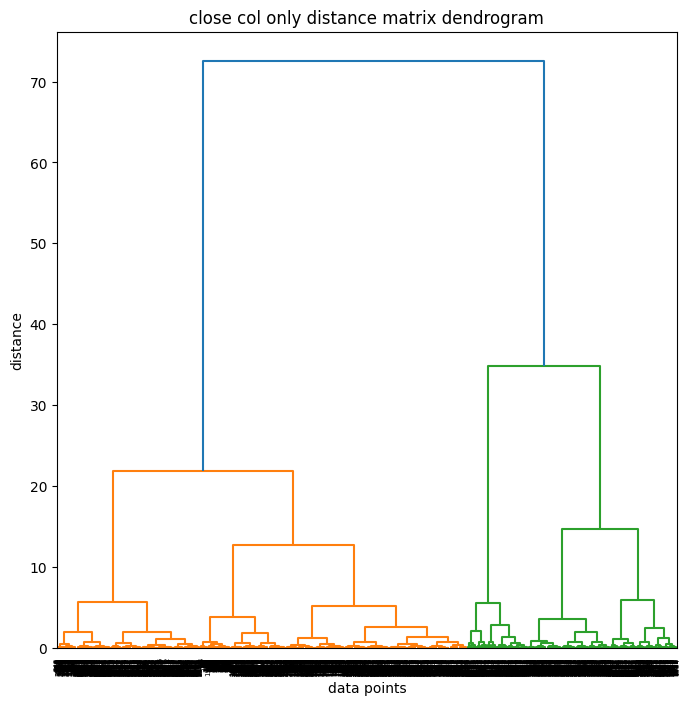

In [45]:
plt.figure(figsize=(8,8))
plt.title('close col only distance matrix dendrogram')
Dendrogram = shc.dendrogram(shc.linkage(x_scaled, method = 'ward'))
plt.xlabel('data points')
plt.ylabel('distance')
plt.show()

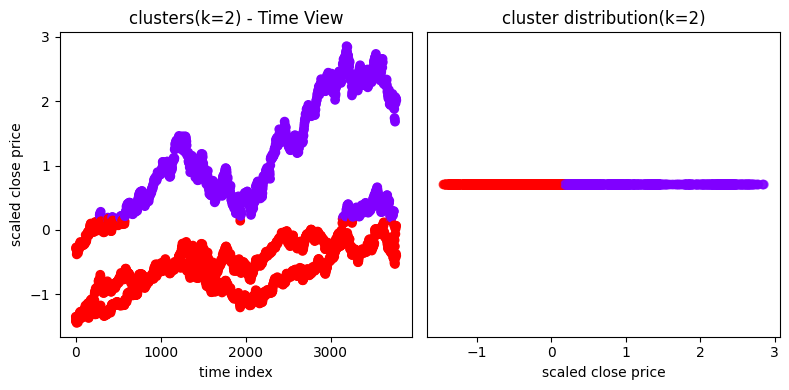

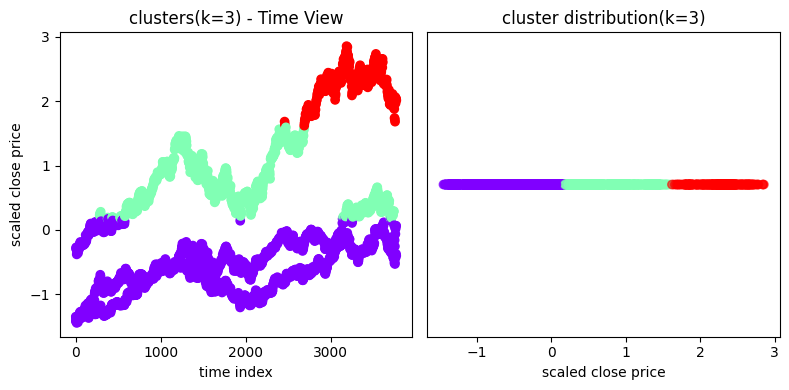

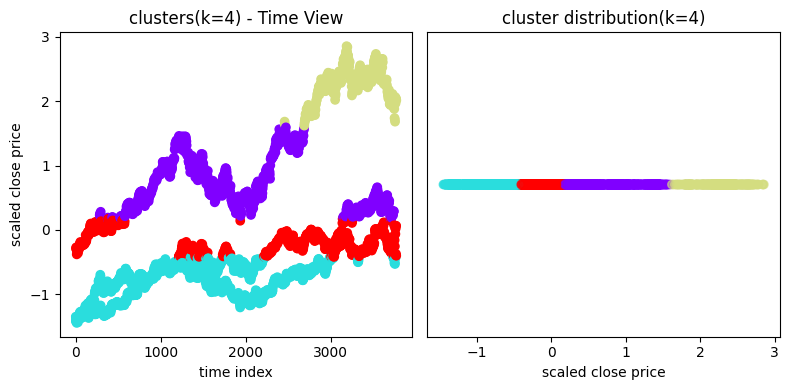

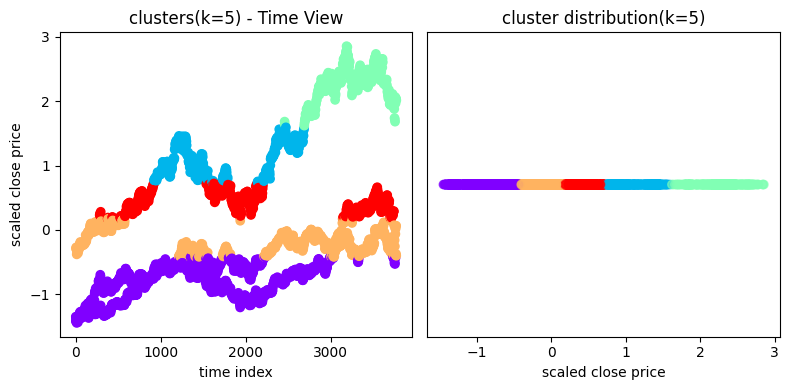

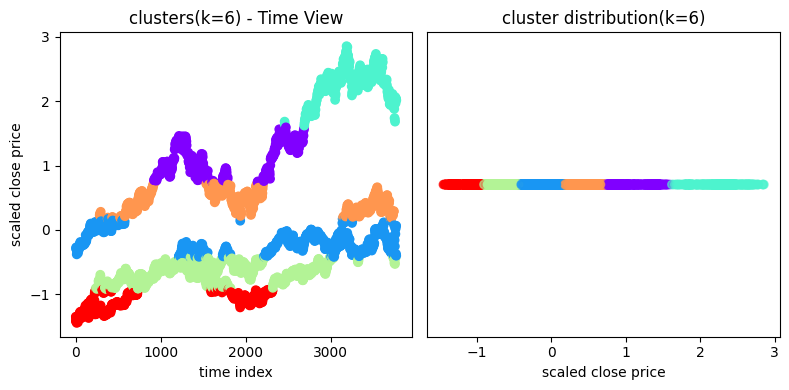

In [46]:
for k in range(2,7):
    model = AgglomerativeClustering(n_clusters=k)
    labels = model.fit_predict(x_scaled)

    plt.figure(figsize=(8,4))

    plt.subplot(1,2,1)
    plt.scatter(x_scaled.index, x_scaled['scaled close'], c=labels, cmap='rainbow')
    plt.title(f'clusters(k={k}) - Time View')
    plt.xlabel('time index')
    plt.ylabel('scaled close price')

    plt.subplot(1,2,2)
    plt.scatter(x_scaled['scaled close'], [0]*len(x_scaled), c=labels, cmap='rainbow', alpha = 0.6)
    plt.title(f'cluster distribution(k={k})')
    plt.xlabel('scaled close price')
    plt.yticks([])

    plt.tight_layout()
    plt.show()

In [47]:
df.iloc[1000]

Date      2021-08-11
Ticker          GOOG
Close     137.040405
High      138.193194
Low       136.702513
Open      137.631113
Volume      15204000
Name: 1000, dtype: object